# Exercise 2.1

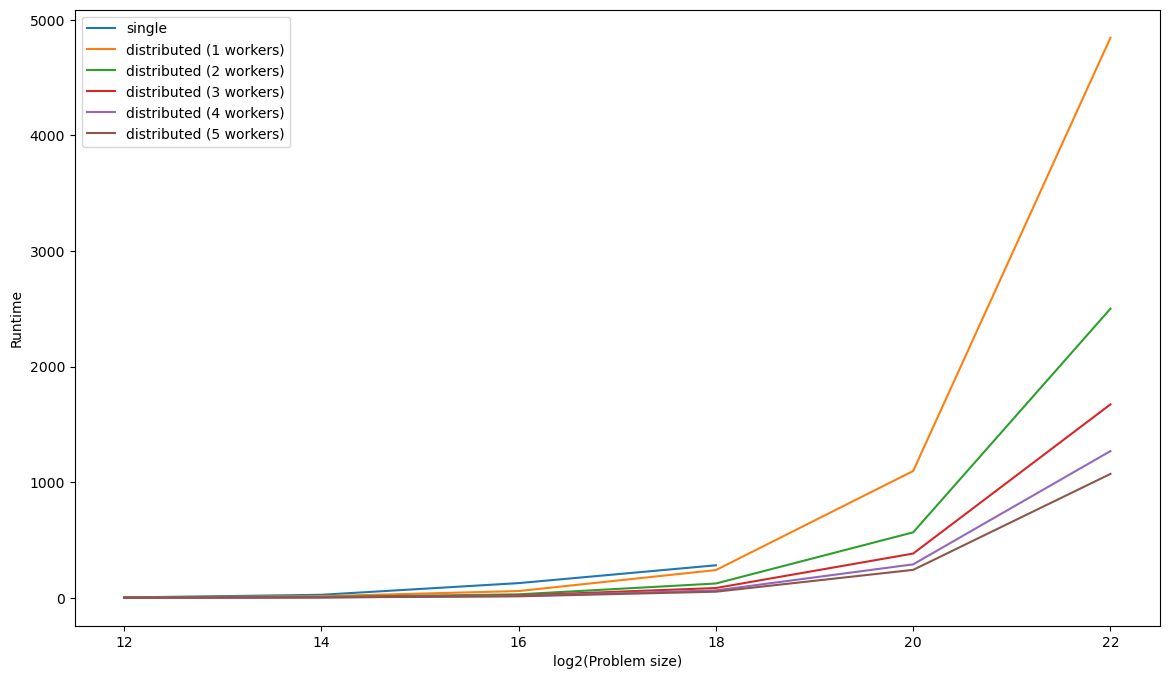

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns


def log2(x):
    return x.apply(lambda x: math.log2(x))

# Read the CSV file
df = pd.read_csv('runtimes.csv')

df['size'] = log2(df['size'])
# Filter the DataFrame
df_single = df[df['algo'] == 'single']
df_distributed = df[df['algo'] == 'distributed']

# Create separate DataFrames for each number of workers
workers = df_distributed['workers'].unique()
dfs_workers = {worker: df_distributed[df_distributed['workers'] == worker] for worker in workers}

plt.figure(figsize=(14, 8))

# Plot the 'single' DataFrame
plt.plot(df_single['size'], df_single['time'], label='single')

# Plot each of the 'distributed' DataFrames
for worker, df_worker in dfs_workers.items():
    plt.plot(df_worker['size'], df_worker['time'], label=f'distributed ({worker} workers)')

plt.xlabel('log2(Problem size)')
plt.ylabel('Runtime')
plt.legend()
plt.show()

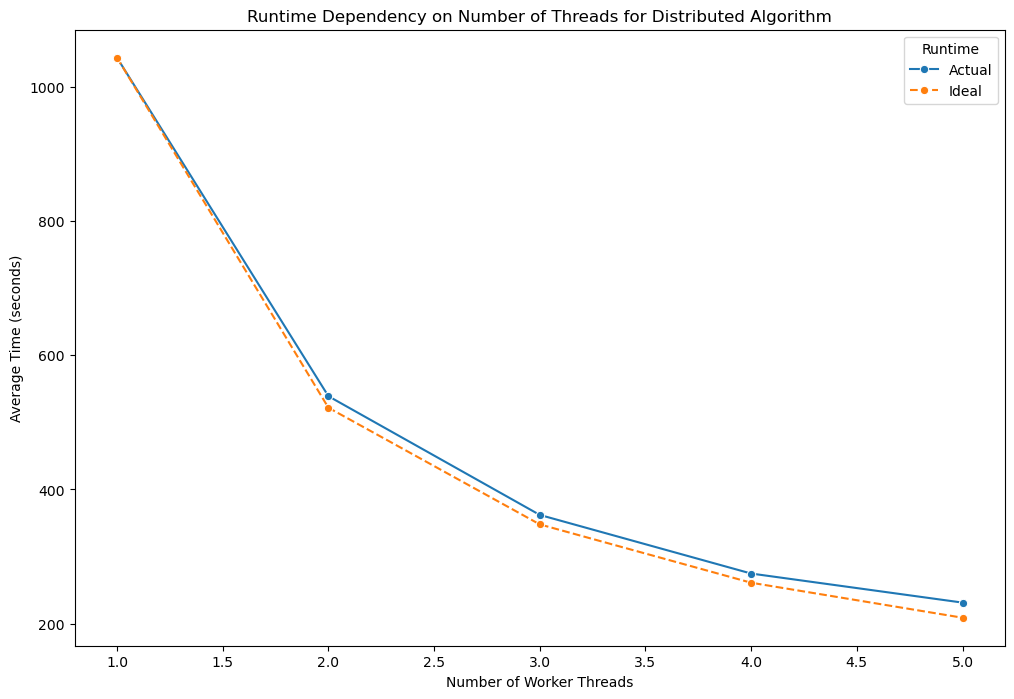

In [2]:
import numpy as np

# Calculate the average runtime for each number of workers
average_runtime_per_worker = df_distributed.groupby('workers')['time'].mean().reset_index()

# Assuming ideal case: if the runtime with 1 worker is x, then with n workers it would ideally be x/n.
# Get the runtime with 1 worker as the baseline
if 1 in average_runtime_per_worker['workers'].values:
    baseline_time = average_runtime_per_worker[average_runtime_per_worker['workers'] == 1]['time'].iloc[0]
    average_runtime_per_worker['ideal_time'] = baseline_time / average_runtime_per_worker['workers']
else:
    # If no single-threaded case, just use the smallest number of workers as baseline for demonstration
    min_workers = average_runtime_per_worker['workers'].min()
    baseline_time = average_runtime_per_worker[average_runtime_per_worker['workers'] == min_workers]['time'].iloc[0]
    scale_factor = baseline_time / min_workers
    average_runtime_per_worker['ideal_time'] = scale_factor / average_runtime_per_worker['workers']

# Plotting the actual vs ideal runtime dependency on the number of threads
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_runtime_per_worker, x='workers', y='time', marker='o', label='Actual')
sns.lineplot(data=average_runtime_per_worker, x='workers', y='ideal_time', marker='o', label='Ideal', linestyle='--')

plt.title('Runtime Dependency on Number of Threads for Distributed Algorithm')
plt.xlabel('Number of Worker Threads')
plt.ylabel('Average Time (seconds)')
plt.legend(title='Runtime')

plt.show()


In [4]:
import re

# Read file with Windows-1252 encoding

with open('zehn_min_rr_Beschreibung_Stationen.txt', 'r', encoding='Windows-1252') as file:
    lines = file.readlines()


# Define the regex pattern for parsing

pattern = re.compile(r'(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\w\s\/()äöüß-]+)\s+([\w\säöüß-]+)')

# column_names = re.sub(pattern, ' ', lines[0].strip()).split(' ')

# Initialize an empty list for parsed data
parsed_data = []

# Process each line with the regex
for line in lines[2:]:
    line = line.strip()  # Remove leading/trailing whitespaces
    if line:  # Make sure the line is not empty
        match = pattern.match(line)
        if match:
            # Extract the groups into a dictionary
            parsed_data.append({
                'Stations_id': match.group(1),
                'von_datum': match.group(2),
                'bis_datum': match.group(3),
                'Stationshoehe': match.group(4),
                'geoBreite': match.group(5),
                'geoLaenge': match.group(6),
                'Stationsname': str(match.group(7)).strip(),
                'Bundesland': str(match.group(8)).strip()
            })

df = pd.DataFrame(parsed_data)


In [5]:
len(df['Bundesland'].unique())

17

In [94]:
string = "00445 20030527 20240422             85     51.8218   11.7110 Bernburg/Saale (Nord)                                                            Sachsen-Anhalt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            "
# string = "00211 20040901 20240422            200     50.5800    8.4685 Aßlar Klein-Altenstädten                                                         Hessen                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    "
# string.strip()string = "00211 20040901 20240422            200     50.5800    8.4685 Aßlar Klein-Altenstädten                                                         Hessen                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    "

string = "00167 20040531 20240422             11     53.8409   13.6854 Anklam                                                                           Mecklenburg-Vorpommern                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    "
string = "19134 20200906 20240422            210     50.9614   10.0714 Gerstungen/Werra                                                                 Thüringen                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 "
string = string.strip()
regex_pattern = r'(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\w\s\/()äöüß-]+)\s+([\w\säöüß-]+)'
match = re.match(regex_pattern, string.strip())
print(match.groups())
match.group(0)

# # re.sub(pattern, ' ', string.stri).split(' ')


('19134', '20200906', '20240422', '210', '50.9614', '10.0714', 'Gerstungen/Werra                                                                ', 'Thüringen')


'19134 20200906 20240422            210     50.9614   10.0714 Gerstungen/Werra                                                                 Thüringen'

In [13]:
# Create scatter plot of geo plot of the weather stations on map using plotly.express library
# ! pip install --upgrade nbformat
import plotly.express as px
fig = px.scatter_geo(df, lat="geoBreite", lon="geoLaenge",
                     hover_name="Stationsname", color="Bundesland",
                     scope="europe", projection="natural earth")
fig.update_geos(center=dict(lon=10.4515, lat=51.1657))
fig.update_layout(width=1200, height=600)
fig.show()

In [16]:
data = pd.read_csv('10min_processed.csv')

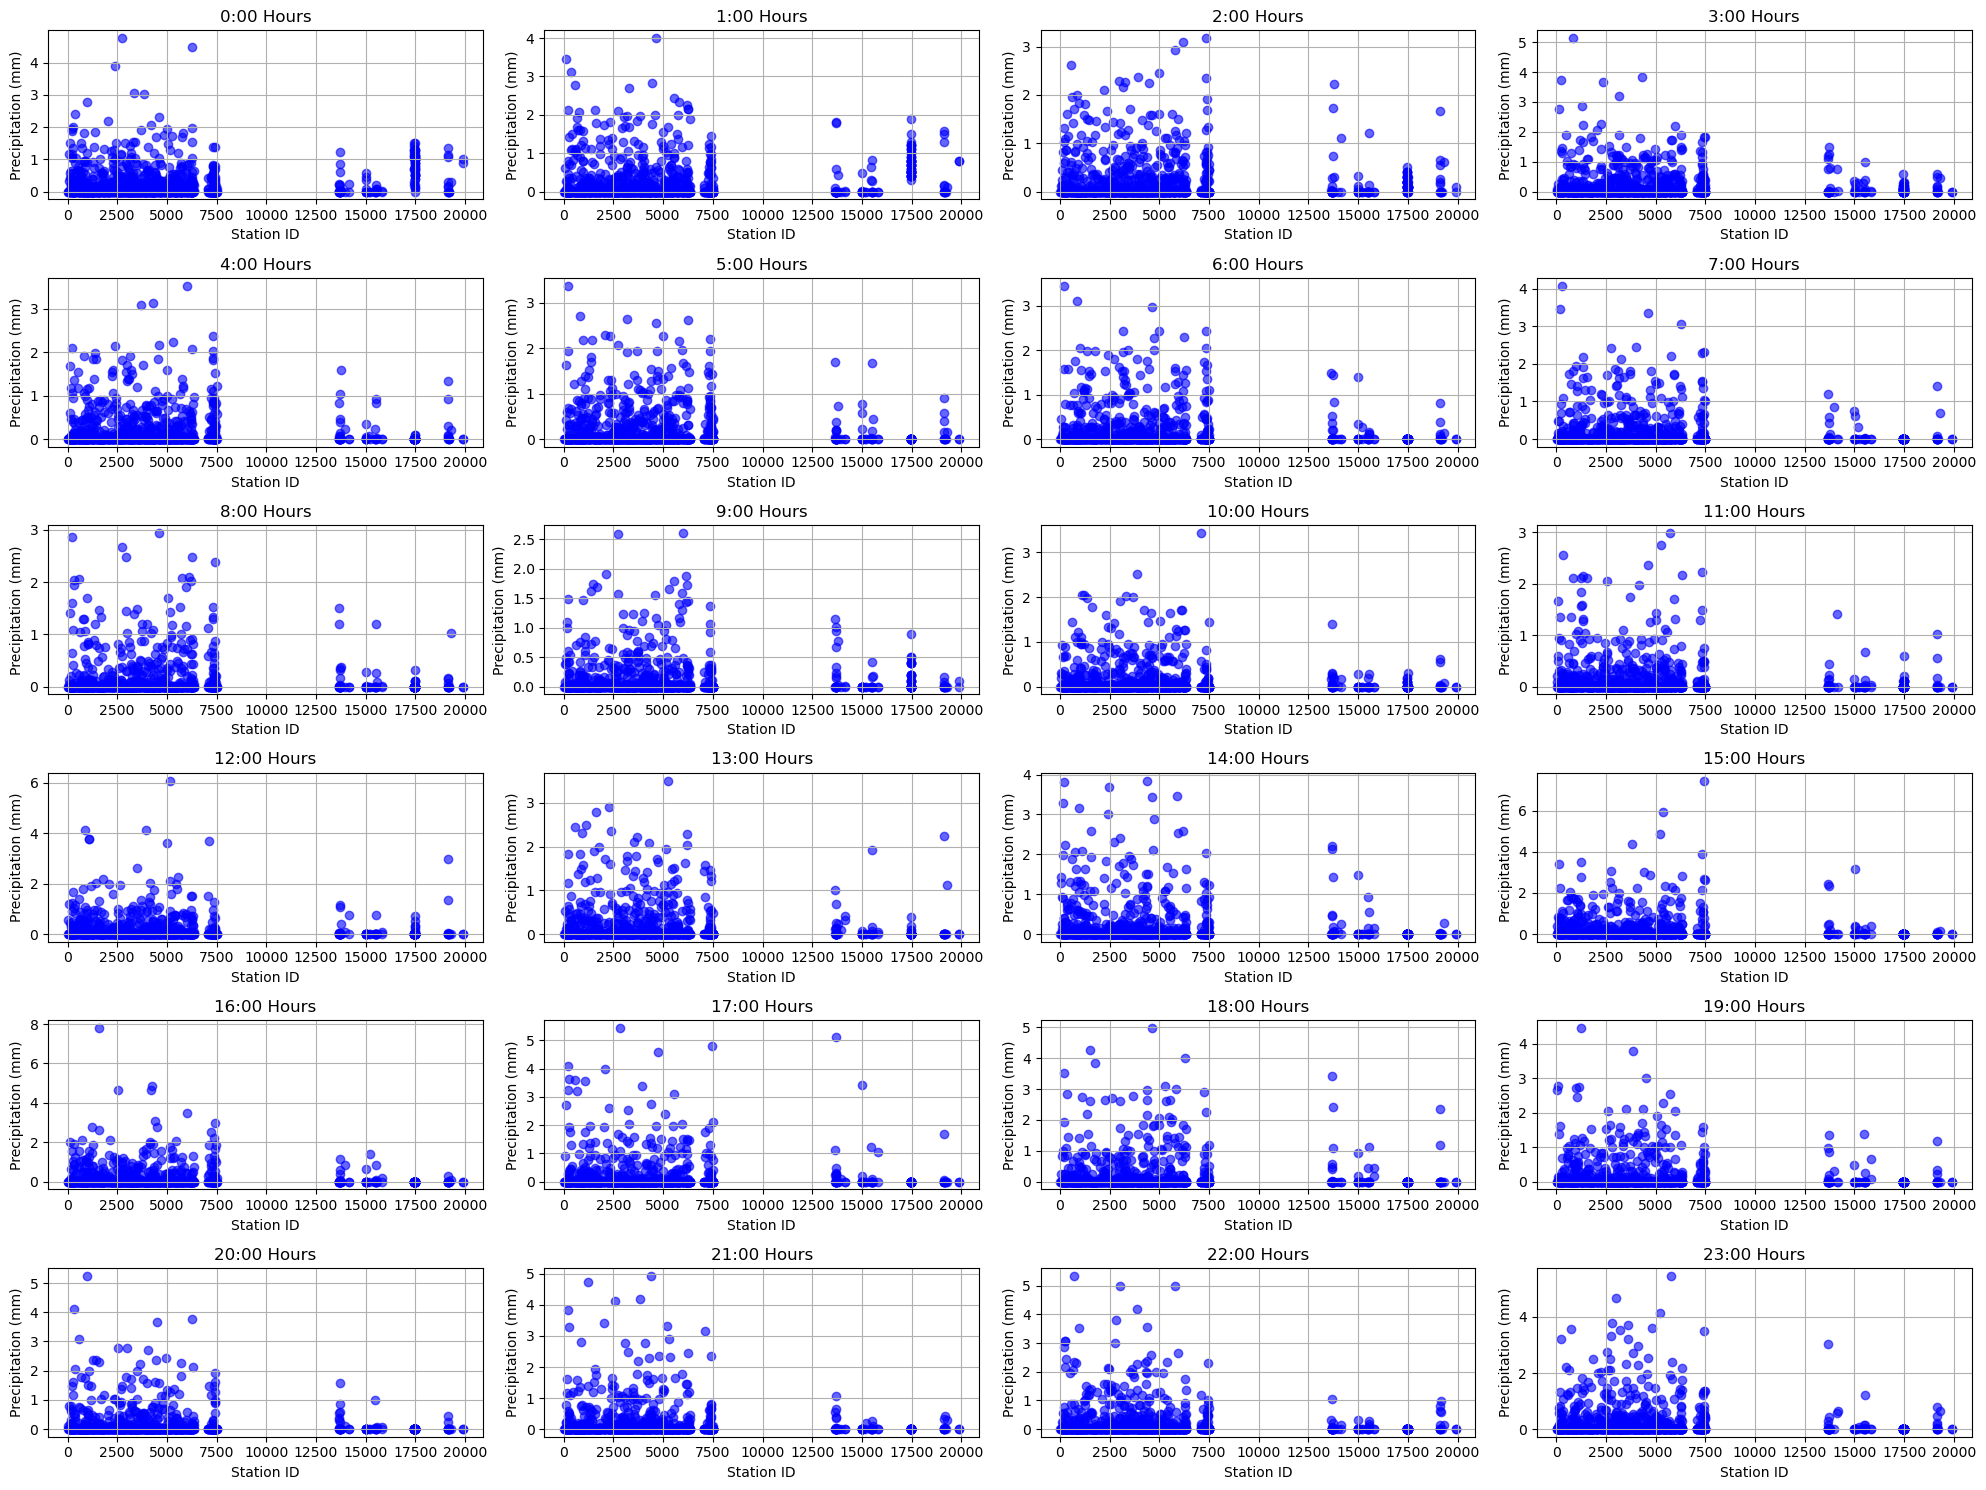

In [18]:
hourly_precipitation = data.groupby(['stationid', 'hour'])['rain'].sum().reset_index()
unique_hours = hourly_precipitation['hour'].unique()
# Create a grid of subplots for each hour using subfigures
fig, axs = plt.subplots(6, 4, figsize=(20, 15)) # Adjust the size as needed
axs = axs.flatten()

for i, hour in enumerate(unique_hours):
    subset = hourly_precipitation[hourly_precipitation['hour'] == hour]
    axs[i].scatter(subset['stationid'], subset['rain'], color='blue', alpha=0.6)
    axs[i].set_title(f'{hour}:00 Hours')
    axs[i].set_xlabel('Station ID')
    axs[i].set_ylabel('Precipitation (mm)')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [23]:
npz = np.load('griddata.npz')
# df= pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, orient='index')

for item in npz.files:
    print(item, npz[item].shape)



(100, 100)
(100, 100)
(100, 100)


# Exercise 3

In [28]:
import numpy as np
import pandas as pd

# Load the NPZ file
npz = np.load('griddata.npz')

# Create a dictionary to convert to DataFrame
data = np.load('griddata.npz')
geolat = data['geolat']
geolong = data['geolong']
ind = data['ind']


ValueError: Per-column arrays must each be 1-dimensional